Group 06: Alexander Robert Algmin Venegas (2871245) and Andreu Boix Torres (2868333) 
SPF: Assignment 1

# Checklist:
- Prepare your submission using this template;
- The content of the cells that you see below are just an example of the format that you should follow;
- Fill out the group number, member names and student IDs above;
- Adjust assignement number above;
- Type up your answers below using Latex and/or Python as exemplified;
- Don't add the text of the question below, only your answers;
- To create a PDF of your submission use the export feature;
- *Delete this cell before creating the PDF*.

# Exercise 1

Consider the $N$-period binomial model with $r = log(2/3)$, $S_0=6$, $u=5/6$, $d=1/6$, and a forward whose pay-off is $C(S_0, \dots, S_N) = S_{N} - 2$. Say, $p=0.4$. Using the tools from Chapter 2 of the lecture notes, do the following:

- Check if the model is arbitrage free;
- For maturity $N=2$, compute the corresponding replicating portfolio for the contract described above;
- Determine the contract price $V_0$, and also $V_1$;
- The replicating portfolio has a very distinctive characteristic; what is it? make a connection to how we priced a forward in the first chapter;
- Suppose someone is willing to buy the contract with maturity $2$ for a price $P > V_0$. Construct an explicit arbitrage strategy.

<em>Note: justify your answers by showing all intermediate computations in your solutions, otherwise you won't get any points for this exercise.<em>

- Check if the model is arbitrage free;

Let us first suppose that the model is not free of arbitrage. Then, we could construct an arbitrage strategy.

At first, we start with no money: $0 = V_0 = \phi_1 S_0 + \psi_1$. Then, $\phi_1 S_0 = -\psi_1$.

As the portfolio in the $N$-period binomial model is self-financing, we have that $V_0 = \phi_1 S_0 + \psi_1 = \phi_2 S_0 + \psi_2$. For that reason, it is also true that $\phi_2 S_0 = -\psi_2$.


Hence, $V_1 = \phi_2 S_1 + \psi_2 e^r$ and, substituting for $\phi_2 S_0 = -\psi_2$

... TO DO

- For maturity $N=2$, compute the corresponding replicating portfolio for the contract described above;

We know that the contract consists in $r = log(2/3)$, $S_0=6$, $u=5/6$, $d=1/6$, and a forward whose pay-off is $C(S_0, \dots, S_N) = S_{N} - 2$. Say, $p=0.4$.
...

 - Determine the contract price $V_0$, and also $V_1$;

...

- The replicating portfolio has a very distinctive characteristic; what is it? make a connection to how we priced a forward in the first chapter;


The distinctive characteristic is that, for $n = 1,2$, it happens that $\psi_n e^{r(n-1)} = -3$ and $\phi_n = 1$. That means that, at time $0$, we borrowed $3$ units of currency at the bank and we buy one unit of stock. $psi_0, \phi_0$ 

# Exercise 2

# Exercise 4

Let us first show a small code that prices stocks according to the T-Binomial Model

In [44]:
import numpy as np

s = 15 # stock price at time 0 in euro
u = 1.05 # up multiplier
d = 0.79 # down multiplier
T = 10 # maturity time
K = 8 # strike price
r1 = 0.045/365 # daily interest rate; 1+r1 multiplier, not exp(r1)
q = (1+r1-d)/(u-d) # risk neutral probability for up

# Determine possible stock prices up to maturity
stockprice = np.full((T+1,T+1),np.nan)
stockprice[0,0] = s

for j in range(1,T+1):
    for i in range(0,j):
        stockprice[i,j] = stockprice[i,j-1]*u
        stockprice[i+1,j] = stockprice[i,j-1]*d
print("Stock prices:")
print(np.around(stockprice, 2)) #just for visualisation

# Determine European call option prices and conditional values
calloption = np.full((T+1,T+1),np.nan)
calloption[:,-1] = np.where(stockprice[:,-1]-K<0,0,stockprice[:,-1]-K)
for j in range(T-1,-1,-1):
    for i in range(0,j+1):
        calloption[i,j] = (q*calloption[i,j+1]+(1-q)*calloption[i+1,j+1])/(1+r1)
print("Call option prices:")
print(np.around(calloption, 4)) #just for visualisation

Stock prices:
[[15.   15.75 16.54 17.36 18.23 19.14 20.1  21.11 22.16 23.27 24.43]
 [  nan 11.85 12.44 13.06 13.72 14.4  15.12 15.88 16.67 17.51 18.38]
 [  nan   nan  9.36  9.83 10.32 10.84 11.38 11.95 12.55 13.17 13.83]
 [  nan   nan   nan  7.4   7.77  8.15  8.56  8.99  9.44  9.91 10.41]
 [  nan   nan   nan   nan  5.84  6.13  6.44  6.76  7.1   7.46  7.83]
 [  nan   nan   nan   nan   nan  4.62  4.85  5.09  5.34  5.61  5.89]
 [  nan   nan   nan   nan   nan   nan  3.65  3.83  4.02  4.22  4.43]
 [  nan   nan   nan   nan   nan   nan   nan  2.88  3.02  3.18  3.33]
 [  nan   nan   nan   nan   nan   nan   nan   nan  2.28  2.39  2.51]
 [  nan   nan   nan   nan   nan   nan   nan   nan   nan  1.8   1.89]
 [  nan   nan   nan   nan   nan   nan   nan   nan   nan   nan  1.42]]
Call option prices:
[[ 7.0899  7.8073  8.572   9.3841 10.2436 11.1506 12.1056 13.1095 14.1638
  15.2709 16.4334]
 [    nan  4.0723  4.5908  5.1563  5.7692  6.429   7.1346  7.8843  8.6761
   9.5088 10.3832]
 [    nan     nan  1

##### (a) Write a function that determines the value of a European call option for a user specified combination of d and u. Fix d = 0.90 and determine the price of the call option for various values of u, for instance, u = 1.02, 1.03, 1.05, 1.11. Plot these values in a graph. Repeat this for d = 0.795.

In [45]:
def value_european_call(d,u):
    s = 15 # stock price at time 0 in euro
    T = 10 # maturity time
    K = 8 # strike price
    r1 = 0.045/365 # daily interest rate; 1+r1 multiplier, not exp(r1)
    q = (1+r1-d)/(u-d) # risk neutral probability for up

    # Determine possible stock prices up to maturity
    stockprice = np.full((T+1,T+1),np.nan)
    stockprice[0,0] = s

    for j in range(1,T+1):
        for i in range(0,j):
            stockprice[i,j] = stockprice[i,j-1]*u
            stockprice[i+1,j] = stockprice[i,j-1]*d
    
    calloption = np.full((T+1,T+1),np.nan)
    calloption[:,-1] = np.where(stockprice[:,-1]-K<0,0,stockprice[:,-1]-K)
    for j in range(T-1,-1,-1):
        for i in range(0,j+1):
            calloption[i,j] = (q*calloption[i,j+1]+(1-q)*calloption[i+1,j+1])/(1+r1)
    return np.round(calloption[0,0],2) # Value of the option contract at time 0

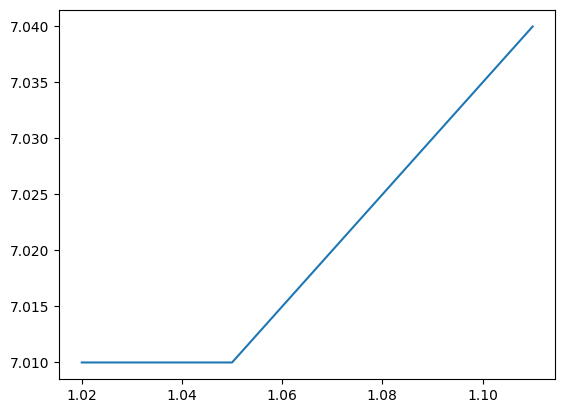

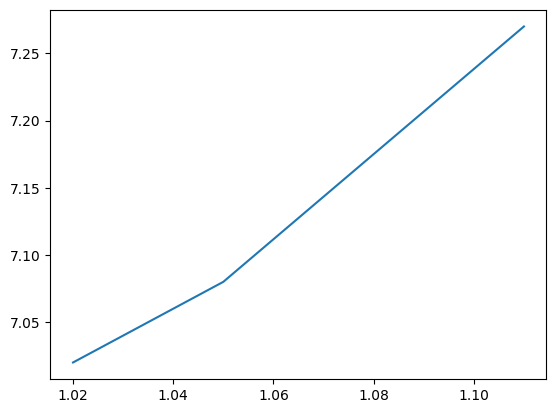

In [46]:
import matplotlib.pyplot as plt

def plot_in_function_of_u(d):
    X = np.array([1.02, 1.03, 1.05, 1.11])
    Y = np.array([])
    for x in X:
        Y = np.append(Y, value_european_call(d,x))

    plt.plot(X,Y)
    plt.show()
    return X,Y

X_90, Y_90 = plot_in_function_of_u(d=0.90)
X_795, Y_795 = plot_in_function_of_u(d=0.795)

##### (b) What is the observed relation between the values of u (and d) and the call option price? Is there an intuitive explanation for these relations?


Intuitively, for V_0 = q(u)e^{-r}C(S0, ..., S9,S9u) + (1-q(u))e^{-r}C(S0, ..., S9,S9d) (definir en función de u y explicar intuitivamente)


In [47]:
print(Y_795/X_795)
print(Y_90/X_90)

[6.88235294 6.83495146 6.74285714 6.54954955]
[6.87254902 6.80582524 6.67619048 6.34234234]


##### (c) Write a function that determines the value of a put option with the same strike price K as the call option from before for a user-specified combination of d and u. Investigate how the parameters u and d influence the price of the put option.


C_0 - S0 + Ke^{-rT} = P_0

In [50]:
def value_european_put(d,u):
    C0 = value_european_call(d,u)
    return np.round(C0 - s + K*np.exp(-r1*T),4)

In [54]:
P0 = value_european_put(d = 0.79, u = 1.05)
print(P0)


# Put-Call Parity Check
print(value_european_call(d = 0.79, u = 1.05) - P0)
print(s - K*np.exp(-r1*T))

7.09
0.0801
7.0099
7.009856936256514


##### (d) Using the fact that the discounted stock prices form a martingale (w.r.t. the natural filtration) under the risk neutral measure, use your code illustrate the so called put-call parity as defined in exercise 3 of this assignment.

In [57]:
q = (1+r1-d)/(u-d) # risk neutral probability for up

putcallparitycheck = np.full((T+1,T+1),np.nan)
calloption = np.full((T+1,T+1),np.nan)
putoption = np.full((T+1,T+1),np.nan)
calloption[:,-1] = np.where(stockprice[:,-1]-K<0,0,stockprice[:,-1]-K)
putoption[:,-1] = np.where(K - stockprice[:,-1]<0,0,K - stockprice[:,-1])
tol = 1e-6
for j in range(T-1,-1,-1):
    for i in range(0,j+1):
        calloption[i,j] = (q*calloption[i,j+1]+(1-q)*calloption[i+1,j+1])/(1+r1)
        putoption[i,j] = (q*putoption[i,j+1]+(1-q)*putoption[i+1,j+1])/(1+r1)
        putcallparitycheck[i,j] = (calloption[i,j] - putoption[i,j] - stockprice[i,j] + K*np.exp(-r1*(T-j))) < tol

for i in range(0,T+1):
    putcallparitycheck[i,T] = (calloption[i,T] - putoption[i,T] - stockprice[i,T] + K) < tol

print("Put-Call Parity Check:")
print(putcallparitycheck)


Put-Call Parity Check:
[[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [nan  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [nan nan  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [nan nan nan  1.  1.  1.  1.  1.  1.  1.  1.]
 [nan nan nan nan  1.  1.  1.  1.  1.  1.  1.]
 [nan nan nan nan nan  1.  1.  1.  1.  1.  1.]
 [nan nan nan nan nan nan  1.  1.  1.  1.  1.]
 [nan nan nan nan nan nan nan  1.  1.  1.  1.]
 [nan nan nan nan nan nan nan nan  1.  1.  1.]
 [nan nan nan nan nan nan nan nan nan  1.  1.]
 [nan nan nan nan nan nan nan nan nan nan  1.]]
